# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [1]:
!pip install ctgan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 167.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 139.2 kB/s eta 0:00:0000:0100:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 152.0 kB/s eta 0:00:0000:0100:01


In [2]:
!pip install table_evaluator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 15.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.0
    Uninstalling psutil-5.9.0:
      Successfully uninstalled psutil-5.9.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4


We use the linkedin Dataset


In [3]:
!gdown 1aXARwE-sdNGWc6biq1HCAT6Aak0mbVZZ

zsh:1: command not found: gdown


In [4]:
import pandas as pd
import pickle
data = pd.read_pickle(r'LinkedIn_Dataset.pcl')
data = data[['Photo','Connections','Followers','Number of Activities']]

FileNotFoundError: [Errno 2] No such file or directory: 'LinkedIn_Dataset.pcl'

In [ ]:
data

,Photo,Connections,Followers,Number of Activities
0,No,500,717,1
1,No,500,1340,0
2,Yes,7,7,0
3,Yes,0,0,0
4,Yes,61,61,6
...,...,...,...,...
3595,Yes,106,717,4
3596,Yes,102,6,3
3597,Yes,435,10,0
3598,Yes,280,34,4


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [ ]:
categorical_features = ['Photo']

#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [ ]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
Gen. (-1.74) | Discrim. (0.06): 100%|██████████| 200/200 [01:39<00:00,  2.00it/s]


#Synthetic data generation

In [ ]:
samples = ctgan.sample(3600)

NameError: name 'ctgan' is not defined

In [ ]:
samples

,Photo,Connections,Followers,Number of Activities
0,No,500,6631,18
1,No,495,1731,11
2,Yes,498,2717,17
3,No,500,-3002,5
4,Yes,45,8923,22
...,...,...,...,...
995,No,506,9100,10
996,No,493,8395,3
997,No,499,2525,15
998,No,498,8708,13


#Evaluation

(3600, 4) (1000, 4)


ValueError: All arrays must be of the same length

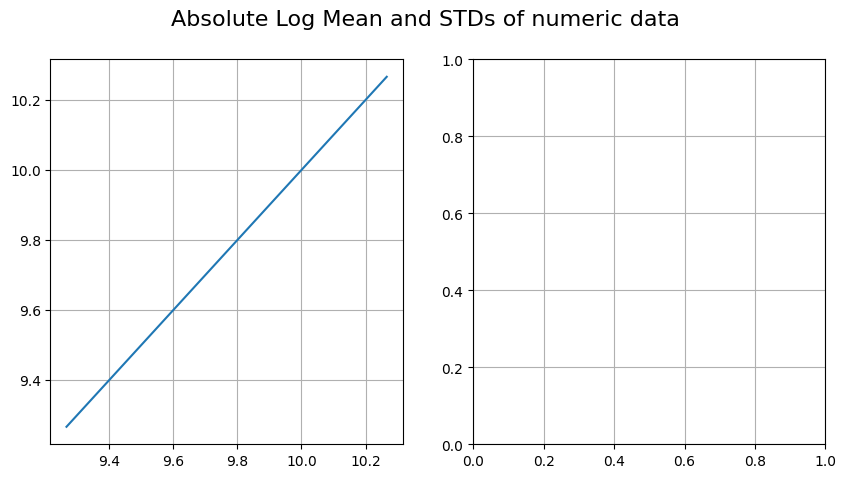

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

(3600, 4) (1000, 4)


ValueError: All arrays must be of the same length

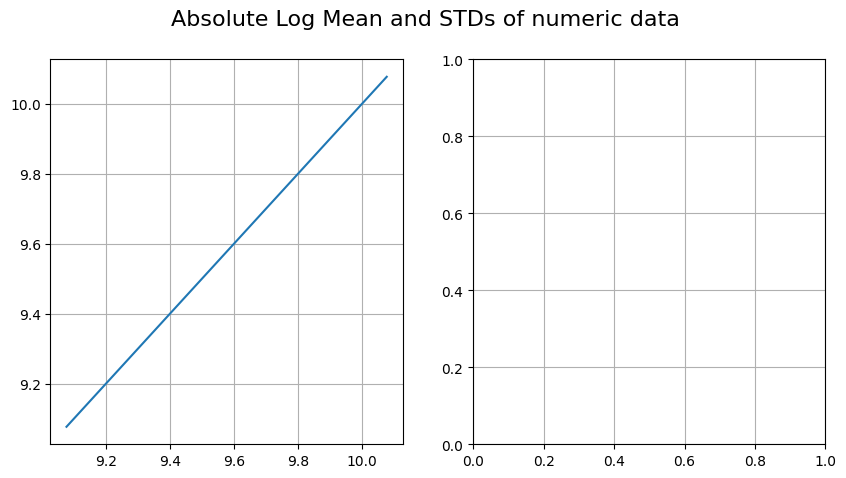

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()